In [51]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
def u_1(sigma,delta_t):
    return math.exp(sigma*math.sqrt(delta_t))

def d_1(sigma,delta_t):
     return math.exp(-sigma*math.sqrt(delta_t))

def beta(r,delta_t,sigma):
    return 0.5*(math.exp(-r*delta_t) + math.exp((r+sigma**2)*delta_t))

def u_2(r,delta_t,sigma):
    b=beta(r,delta_t,sigma)
    return b+ math.sqrt(b*b-1)
def d_2(r,delta_t,sigma):
    b=beta(r,delta_t,sigma)
    return b- math.sqrt(b*b-1)

s_0=50
k=50
T=1
r=0.08
sigma=0.30

def simulate(m,u,d):
    delta_t=T/m
    m+=1
    arr=np.zeros((m,m))
    arr[0][0]=s_0
    for i in range(0,m-1):
        for j in range(0,i+1):
            arr[i+1][j]=arr[i][j]*u
            arr[i+1][j+1]=arr[i][j]*d
    # print(arr)
    return arr

def pro(r,delta_t,u,d):
    return (math.exp(r*delta_t)-d)/(u-d)

def european_call(m,u,d):
    delta_t=T/m
    p=pro(r,delta_t,u,d)
    arr=simulate(m,u,d)
    m+=1
    for j in range(0,m):
        arr[m-1][j]=max(arr[m-1][j]-k,0)
    for i in range(m-2,-1,-1):
        for j in range(0,i+1):
            # print(i,j)
            arr[i][j]=p*(arr[i+1][j]) + (1-p)*(arr[i+1][j+1])
    # print(u,d,p)
    # print(arr)
    return arr
def european_put(m,u,d):
    delta_t=T/m
    p=pro(r,delta_t,u,d)
    arr=simulate(m,u,d)
    m+=1
    for j in range(0,m):
        arr[m-1][j]=max(-arr[m-1][j]+k,0)
    for i in range(m-2,-1,-1):
        for j in range(0,i+1):
            arr[i][j]=p*(arr[i+1][j]) + (1-p)*(arr[i+1][j+1])
    return arr

def american_put(m,u,d):
    delta_t=T/m
    p=pro(r,delta_t,u,d)
    arr=simulate(m,u,d)
    m+=1
    for j in range(0,m):
        arr[m-1][j]=max(-arr[m-1][j]+k,0)
    for i in range(m-2,-1,-1):
        for j in range(0,i+1):
            arr[i][j]=max(p*(arr[i+1][j]) + (1-p)*(arr[i+1][j+1]),-arr[i][j]+k)
    return arr

def american_call(m,u,d):
    delta_t=T/m
    p=pro(r,delta_t,u,d)
    arr=simulate(m,u,d)
    m+=1
    for j in range(0,m):
        arr[m-1][j]=max(arr[m-1][j]-k,0)
    for i in range(m-2,-1,-1):
        for j in range(0,i+1):
            arr[i][j]=max(p*(arr[i+1][j]) + (1-p)*(arr[i+1][j+1]),arr[i][j]-k)
    return arr

M=[5,10,20]
#M=[5]
print("For type 1 u and d")
for m in M:
    delta_t=T/m
    u=u_1(sigma,delta_t)
    d=d_1(sigma,delta_t)
    print("For M=",m)
    arr=european_call(m,u,d)
    print("european call",arr[0][0])
    arr=american_call(m,u,d)
    print("american call",arr[0][0])
    arr=european_put(m,u,d)
    print("european put",arr[0][0])
    arr=american_put(m,u,d)
    print("american put",arr[0][0])
print()
print("For type 2 u and d")
for m in M:
    delta_t=T/m
    u=u_2(r,delta_t,sigma)
    d=d_2(r,delta_t,sigma)
    print("For M=",m)
    arr=european_call(m,u,d)
    print("european call",arr[0][0])
    arr=american_call(m,u,d)
    print("american call",arr[0][0])
    arr=european_put(m,u,d)
    print("european put",arr[0][0])
    arr=american_put(m,u,d)
    print("american put",arr[0][0])



For type 1 u and d
For M= 5
european call 8.787221636918243
american call 8.787221636918243
european put 4.622868253170295
american put 4.878529214164752
For M= 10
european call 8.351901872393885
american call 8.351901872393885
european put 4.187548488645928
american put 4.589402251772177
For M= 20
european call 8.430326731513965
american call 8.430326731513965
european put 4.2659733477659945
american put 4.620537149102096

For type 2 u and d
For M= 5
european call 8.905184383916826
american call 8.905184383916826
european put 4.740831000168878
american put 4.993540364862467
For M= 10
european call 8.4064752519337
american call 8.4064752519337
european put 4.242121868185749
american put 4.643518313911606
For M= 20
european call 8.457979808803358
american call 8.457979808803358
european put 4.293626425055385
american put 4.647838054840908


For M=20
Type 1
european call
For t= 0.0
[8.43032673 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]
For t= 0.25
[24.64152034 16.07444199  9.46487085  4.87995275  2.12971361  0.75666004
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.        ]
For t= 0.5
[5.17830308e+01 3.90085249e+01 2.78874527e+01 1.83976337e+01
 1.07595483e+01 5.29800810e+00 2.06179377e+00 5.83876124e-01
 1.05605454e-01 9.07774954e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
For t= 0.75
[89.52636716 72.00835386 56.68978713 43.29451893 31.58107252 21.33828944
 12.55333503  5.77660264  1.75851893  0.25528291  0.          0.
  0.       

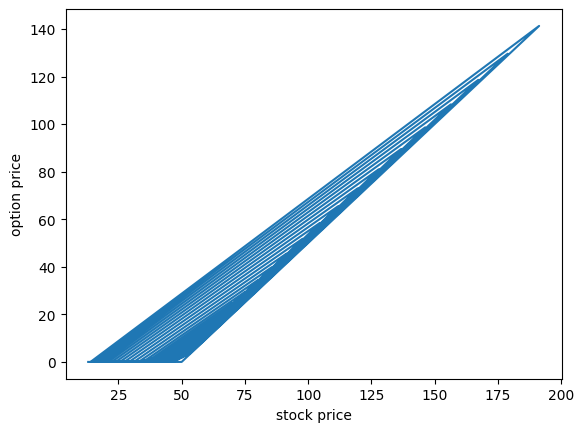

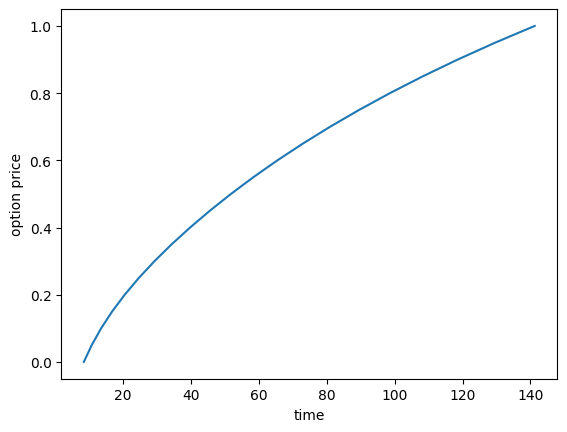

american call
For t= 0.0
[8.43032673 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]
For t= 0.25
[24.64152034 16.07444199  9.46487085  4.87995275  2.12971361  0.75666004
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.        ]
For t= 0.5
[5.17830308e+01 3.90085249e+01 2.78874527e+01 1.83976337e+01
 1.07595483e+01 5.29800810e+00 2.06179377e+00 5.83876124e-01
 1.05605454e-01 9.07774954e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
For t= 0.75
[89.52636716 72.00835386 56.68978713 43.29451893 31.58107252 21.33828944
 12.55333503  5.77660264  1.75851893  0.25528291  0.          0.
  0.          0.          0

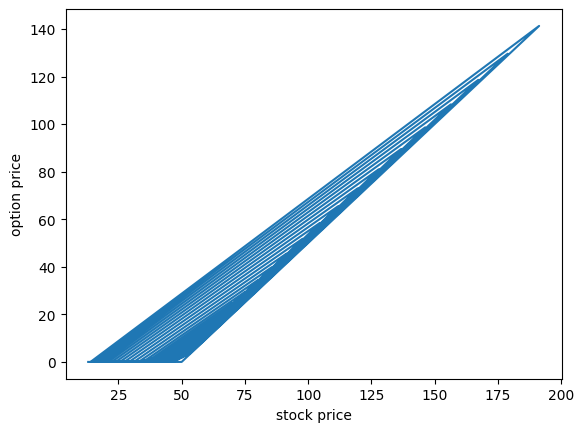

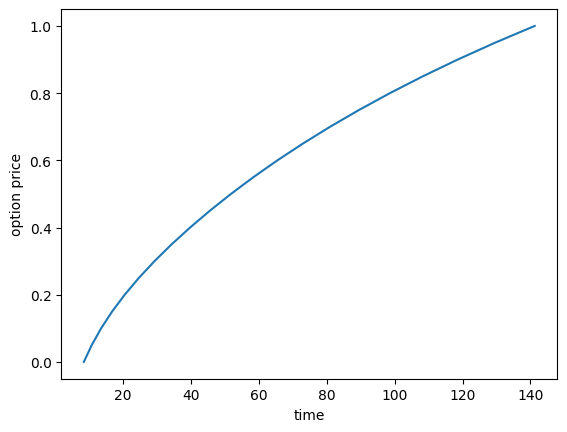

european put
For t= 0.0
[4.26597335 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]
For t= 0.25
[ 0.39186008  1.1470809   2.68936233  5.23280379  8.71593426 12.79362938
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.        ]
For t= 0.5
[1.06446393e-17 4.70228905e-03 5.83648603e-02 3.40254420e-01
 1.24700604e+00 3.25746939e+00 6.55512294e+00 1.07907237e+01
 1.53086196e+01 1.95809727e+01 2.33922477e+01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
For t= 0.75
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.88933700e-16 1.71812179e-01 1.22729365e+00
 4.05806253e+00 8.54378219e+00 1.35255211e+0

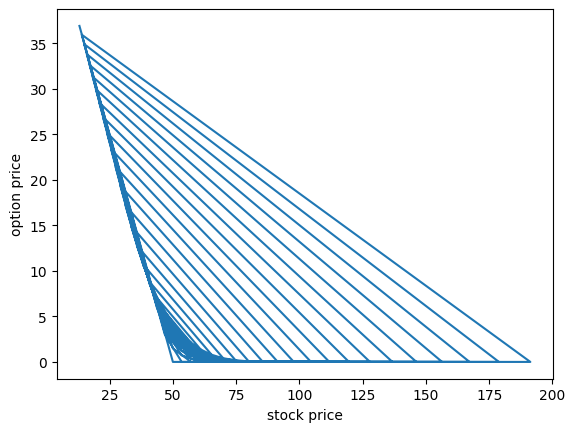

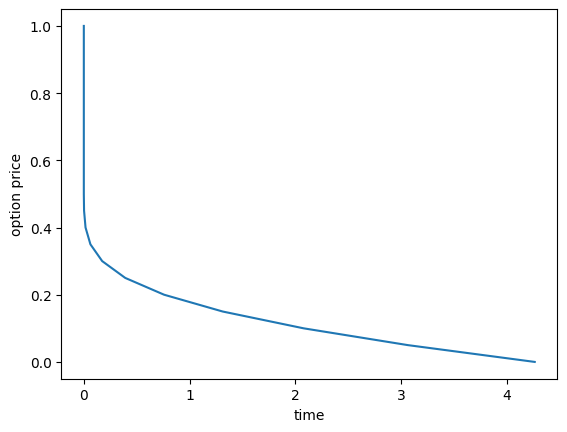

american put
For t= 0.0
[4.62053715 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]
For t= 0.25
[ 0.41584122  1.22031453  2.87606198  5.64592043  9.5218992  14.24776414
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.        ]
For t= 0.5
[1.06446393e-17 4.99057614e-03 6.19046681e-02 3.60604580e-01
 1.32269200e+00 3.46575416e+00 7.03279326e+00 1.17671594e+01
 1.65674235e+01 2.07649980e+01 2.44355526e+01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
For t= 0.75
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.88933700e-16 1.82345609e-01 1.30113275e+00
 4.29561078e+00 9.11444233e+00 1.42477641e+0

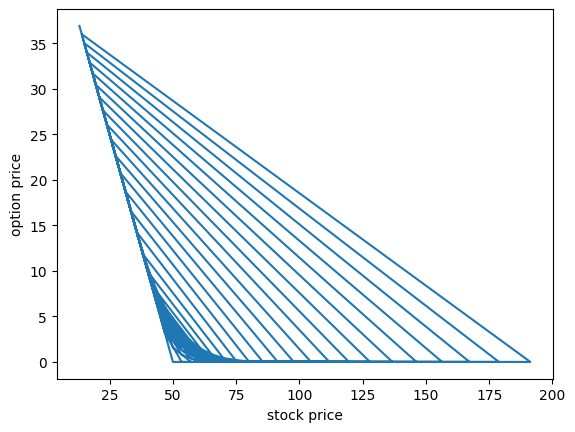

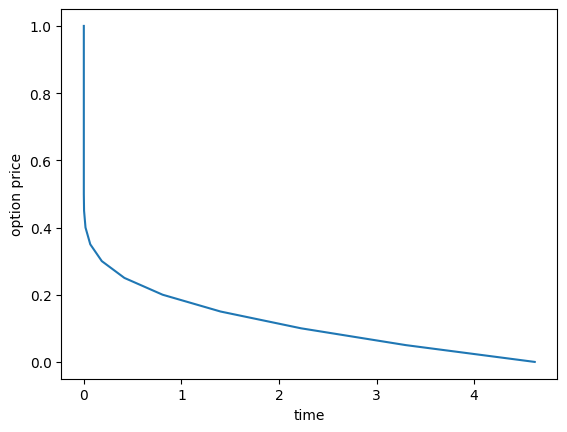

Type 2
european call
For t= 0.0
[8.45797981 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]
For t= 0.25
[24.7620689  16.14436099  9.50047628  4.89521245  2.1349282   0.7579708
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.        ]
For t= 0.5
[5.21051847e+01 3.92338608e+01 2.80356363e+01 1.84862213e+01
 1.08054435e+01 5.31738475e+00 2.06796450e+00 5.85207702e-01
 1.05767094e-01 9.08457771e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
For t= 0.75
[90.1893143  72.51061194 57.06129859 43.56023511 31.76173565 21.45109681
 12.61364738  5.80112563  1.76485466  0.25602107  0.          0.
  0.          0.     

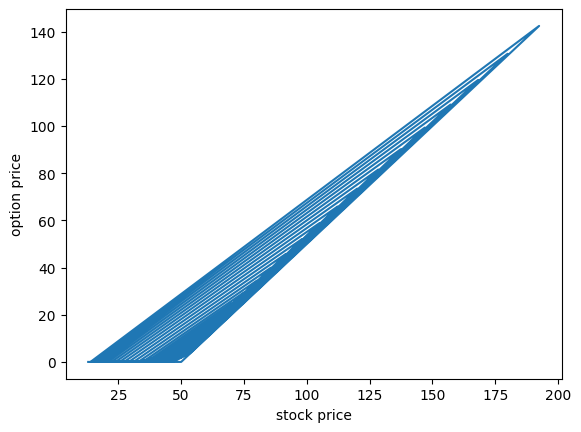

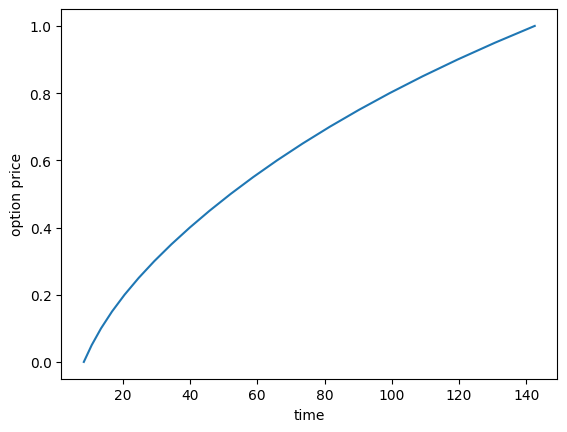

american call
For t= 0.0
[8.45797981 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]
For t= 0.25
[24.7620689  16.14436099  9.50047628  4.89521245  2.1349282   0.7579708
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.        ]
For t= 0.5
[5.21051847e+01 3.92338608e+01 2.80356363e+01 1.84862213e+01
 1.08054435e+01 5.31738475e+00 2.06796450e+00 5.85207702e-01
 1.05767094e-01 9.08457771e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
For t= 0.75
[90.1893143  72.51061194 57.06129859 43.56023511 31.76173565 21.45109681
 12.61364738  5.80112563  1.76485466  0.25602107  0.          0.
  0.          0.          0.

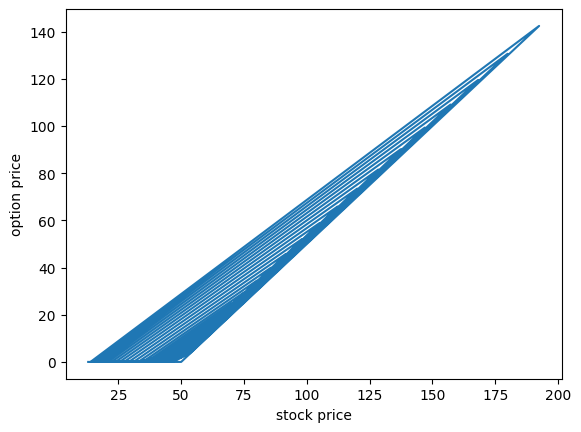

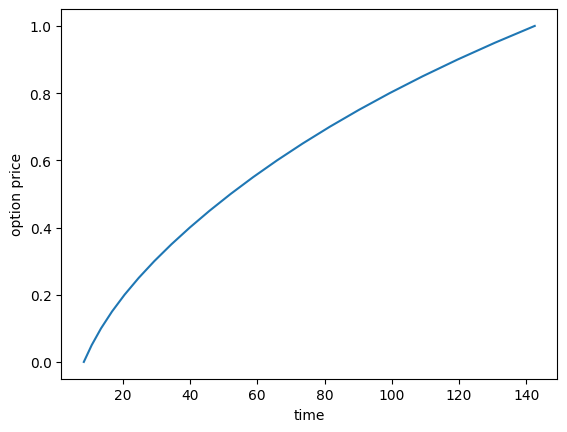

european put
For t= 0.0
[4.29362643 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]
For t= 0.25
[ 0.39499751  1.15541751  2.70702326  5.26375003  8.76228698 12.85487638
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.        ]
For t= 0.5
[5.34631633e-18 4.74427576e-03 5.88395564e-02 3.42760188e-01
 1.25527618e+00 3.27684605e+00 6.59004576e+00 1.08423237e+01
 1.53746960e+01 1.96578072e+01 2.34761983e+01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
For t= 0.75
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.94904752e-16 1.72956824e-01 1.23457576e+00
 4.07946972e+00 8.58404544e+00 1.35831072e+0

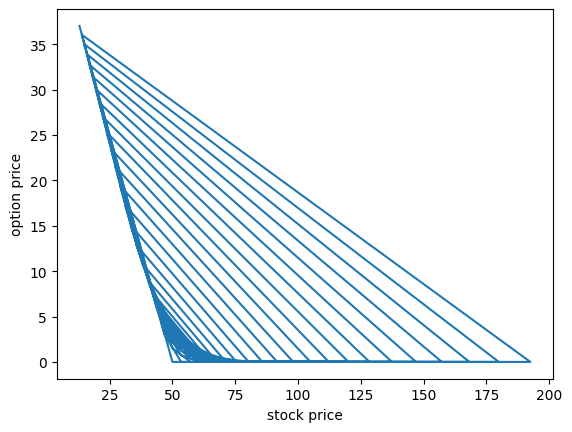

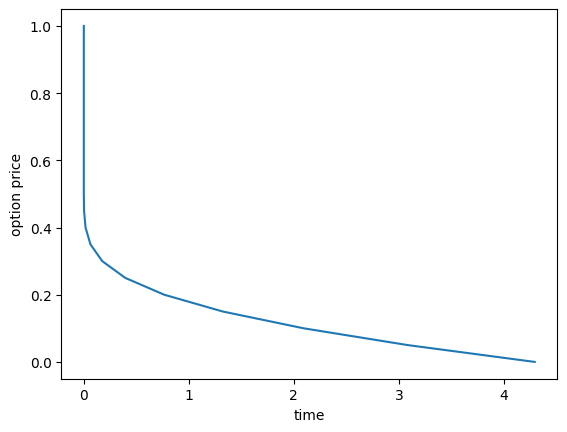

american put
For t= 0.0
[4.64783805 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]
For t= 0.25
[ 0.41903332  1.22873852  2.89371729  5.67619094  9.56616646 14.30420996
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.        ]
For t= 0.5
[5.34631633e-18 5.03364094e-03 6.23896111e-02 3.63152281e-01
 1.33102831e+00 3.48507625e+00 7.06702811e+00 1.18154568e+01
 1.66307537e+01 2.08388132e+01 2.45162115e+01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
For t= 0.75
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.94904752e-16 1.83505891e-01 1.30846417e+00
 4.31698921e+00 9.15318477e+00 1.43042100e+0

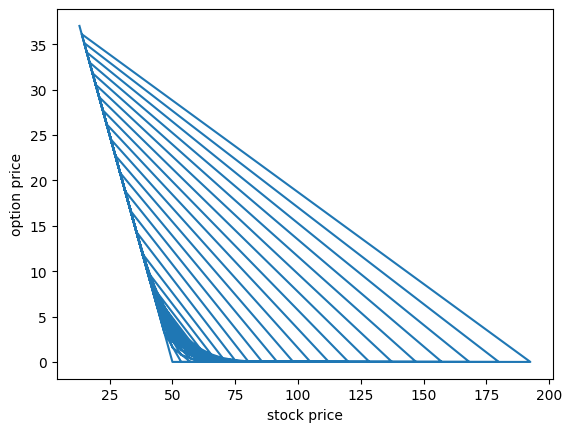

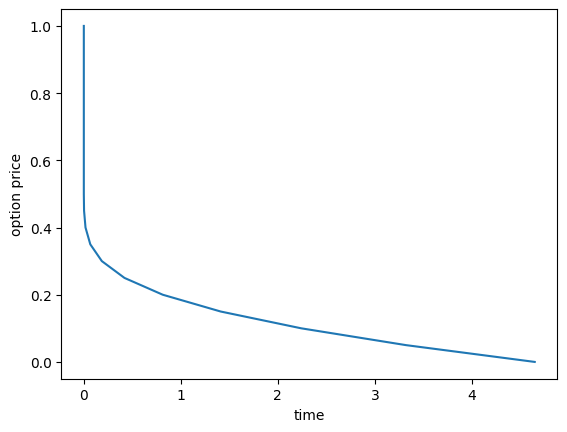

In [52]:
#for M=20
print("For M=20")


def m_print(arr):
    t =[ 0,0.25,0.50,0.75,0.95]
    for i in range(0,21):
        delta_t=T/20
        tmp=i*delta_t
        tmp=int(tmp*100)
        tmp=tmp/100
       # print(tmp)
        if(tmp in t):
            print("For t=",tmp)
            print(arr[i])

def m_plot_stock(arr_1,arr_2):
    x=[]
    y=[]
    for i in range(0,21):
        for j in range(0,i+1):
            x.append(arr_1[i][j])
            y.append(arr_2[i][j])
    plt.plot(x,y)
    plt.xlabel("stock price")
    plt.ylabel("option price")
    plt.show()
    
def m_plot_time(arr_1,arr_2):
    delta_t=T/20
    t=[]
    x=[]
    for i in range(0,21):
        tmp=i*delta_t
        tmp=int(tmp*100)
        tmp=tmp/100
        t.append(tmp)
        x.append(arr[i][0])
#we are considering only the first value of option price in this plot 
    plt.plot(x,t)
    plt.xlabel("time")
    plt.ylabel("option price")
    plt.show()

print("Type 1")
u=u_1(sigma,delta_t)
d=d_1(sigma,delta_t)
arr1=simulate(m,u,d)
print("european call")
arr=european_call(20,u,d)
m_print(arr)
m_plot_stock(arr1,arr)
m_plot_time(arr1,arr)
print("american call")
arr=american_call(20,u,d)
m_print(arr)
m_plot_stock(arr1,arr)
m_plot_time(arr1,arr)
print("european put")
arr=european_put(20,u,d)
m_print(arr)
m_plot_stock(arr1,arr)
m_plot_time(arr1,arr)
print("american put")
arr=american_put(20,u,d)
m_print(arr)
m_plot_stock(arr1,arr)
m_plot_time(arr1,arr)


print("Type 2")
u=u_2(r,delta_t,sigma)
d=d_2(r,delta_t,sigma)
arr1=simulate(m,u,d)
print("european call")
arr=european_call(20,u,d)
m_print(arr)
m_plot_stock(arr1,arr)
m_plot_time(arr1,arr)
print("american call")
arr=american_call(20,u,d)
m_print(arr)
m_plot_stock(arr1,arr)
m_plot_time(arr1,arr)
print("european put")
arr=european_put(20,u,d)
m_print(arr)
m_plot_stock(arr1,arr)
m_plot_time(arr1,arr)
print("american put")
arr=american_put(20,u,d)
m_print(arr)
m_plot_stock(arr1,arr)
m_plot_time(arr1,arr)